f(x) = x²

pares ordenados são representados por tuplas (2,4)

dominio x contra-dominio

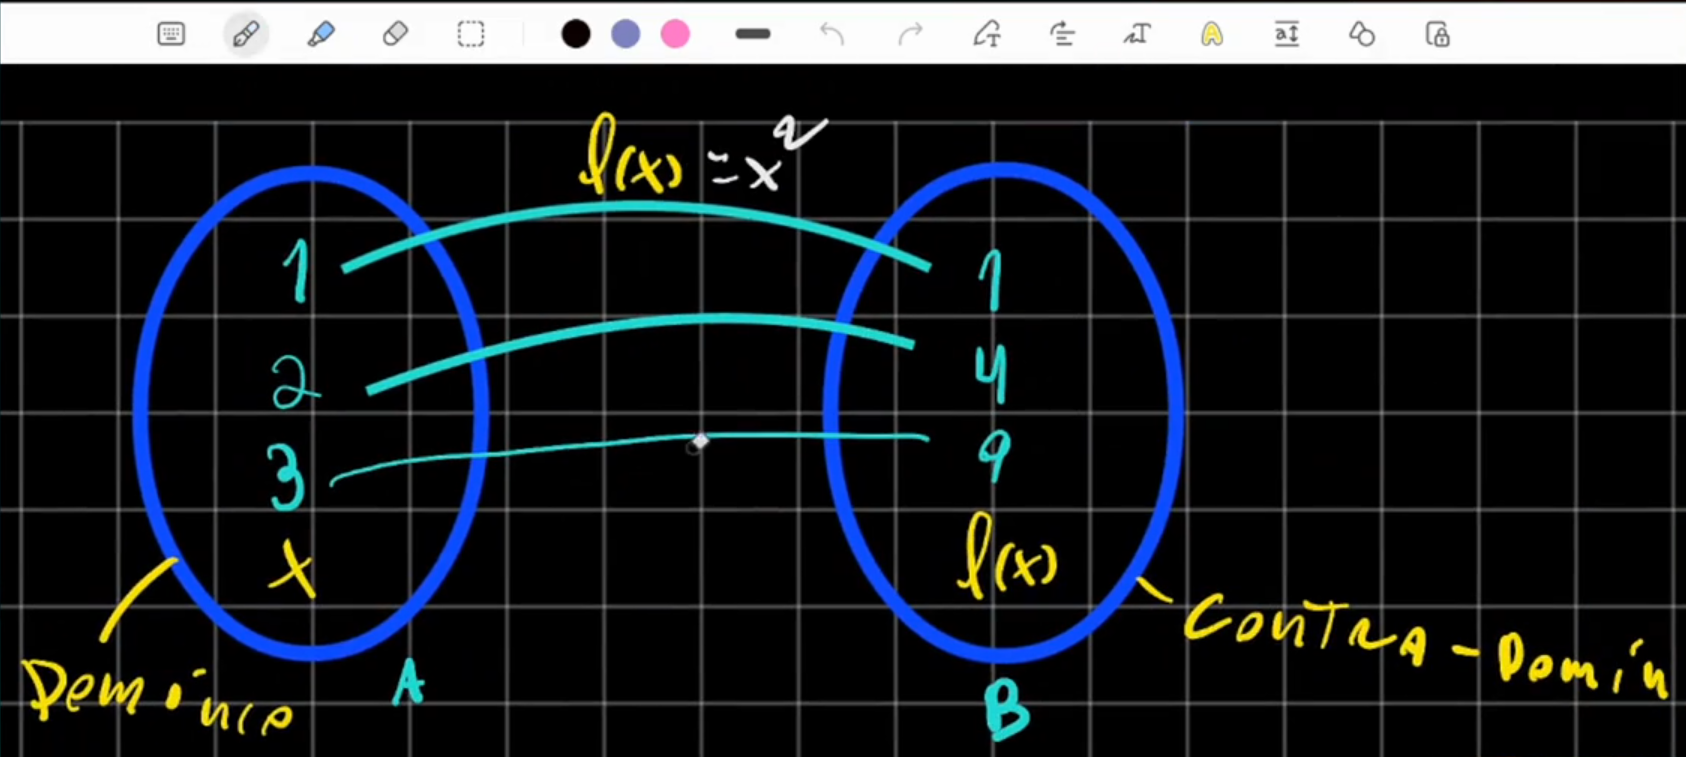

simetria de funções
par
f(x) = f(-x)

ímpar
-f(x) = f(-x)

In [8]:
import json
import csv
import re


In [9]:
# Lê o conteúdo bruto
with open('tiny_response.json', 'r', encoding='utf-8') as f:
    raw_content = f.read()

# Limpa caracteres de controle indesejados (ex: \n, \r dentro de strings)
clean_content = re.sub(r'[\x00-\x1F\x7F]', '', raw_content)

# Agora sim faz o parse
full_data = json.loads(clean_content)

# Continua o processamento normalmente
pedidos = full_data['retorno']['pedidos']

with open('tiny_export.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = [
        'numero_ecommerce',
        'data_pedido',
        'data_prevista',
        'nome',
        'valor',
        'id_vendedor',
        'nome_vendedor',
        'situacao',
        'codigo_rastreamento',
        'url_rastreamento',
        'pedido_id',
        'pedido_numero'
    ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for item in pedidos:
        pedido = item['pedido']
        writer.writerow({
            'numero_ecommerce': pedido.get('numero_ecommerce', ''),
            'data_pedido': pedido.get('data_pedido', ''),
            'data_prevista': pedido.get('data_prevista', ''),
            'nome': pedido.get('nome', '').replace('\n', ' ').replace('\r', ' '),  # Remove quebras de linha dentro do nome
            'valor': pedido.get('valor', ''),
            'id_vendedor': pedido.get('id_vendedor', ''),
            'nome_vendedor': pedido.get('nome_vendedor', ''),
            'situacao': pedido.get('situacao', ''),
            'codigo_rastreamento': pedido.get('codigo_rastreamento', ''),
            'url_rastreamento': pedido.get('url_rastreamento', ''),
            'pedido_id': pedido.get('id', ''),
            'pedido_numero': pedido.get('numero', '')
        })